Task: 
1. Help a muesli distribution company understand their delivery process.
    - Create KPI's to track the health of the company and better serve customers


Workflow:
1. Order received (Day 1)
2. Order processed in warehouse and made ready to ship (~ 2 days)
3. Order leaves warehouse in truck following day
4. Order delivered to customer (handled by logistics company)

## **Checklist**

1. Understanding
2. Hypothesis
3. Explore
4. Clean
5. Relationships
6. Back to hypothesis
7. Fine tune
8. Explain


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import calendar

In [100]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [101]:
pd.options.display.float_format = "{:,.2f}".format
plt.style.use('seaborn-dark')
muesli_df = pd.read_csv('../EDA-GroupProject/data/Group4_Muesli Project raw data - Orders.csv')
muesli_df.head()

,Index,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Origin Channel,Country/Region,City,State,Postal Code,Region,Category,Sub-Category,Product ID,Sales,Quantity,Discount,Profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,"90,049.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,90.57,3,0.00,11.77
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,"55,122.00",Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,45.98,2,0.00,19.77
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,"19,901.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45.00,3,0.00,4.95
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,"12,180.00",East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30.00,2,0.00,3.30
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,"90,004.00",West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,13.98,2,0.00,6.15


In [102]:
#lets combine DataFrames 
#Load the remaining Dataframes
cam_df = pd.read_csv('data/Campaign Data.csv')
pro_df = pd.read_csv('data/Order Process Data.csv')
int_df = pd.read_csv('data/Intern Data Study.csv')

In [103]:
display(cam_df.head())
display(pro_df.head())
display(int_df.head())

,Order ID,Arrival Scan Date,Customer Name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly


,Row ID,Order ID,Order Date,On Truck Scan Date,Ship Mode
0,3074,CA-2019-125206,3/1/2019,07/01/2019,Express
1,4919,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
2,4920,CA-2019-160304,2/1/2019,09/01/2019,Standard Processing
3,8604,US-2019-116365,3/1/2019,09/01/2019,Standard Processing
4,8605,US-2019-116365,3/1/2019,09/01/2019,Standard Processing


,Order ID,Ready to Ship Date,Pickup Date
0,CA-2019-116540,02/09/2019,03/09/2019
1,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019


In [104]:
# remove capitalization and white-spaces
muesli_df.rename(columns=lambda x : x.lower(), inplace=True)
muesli_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
cam_df.rename(columns=lambda x : x.lower(), inplace=True)
cam_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
pro_df.rename(columns=lambda x : x.lower(), inplace=True)
pro_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)
int_df.rename(columns=lambda x : x.lower(), inplace=True)
int_df.rename(columns=lambda x : x.replace(' ', '_'), inplace=True)

In [105]:
# display results of lowercase and white-space changes
display(muesli_df.columns)
display(cam_df.columns)
display(pro_df.columns)
display(int_df.columns)

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country/region', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

Index(['order_id', 'arrival_scan_date', 'customer_name'], dtype='object')

Index(['row_id', 'order_id', 'order_date', 'on_truck_scan_date', 'ship_mode'], dtype='object')

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [106]:
# check for duplicates
int_df["order_id"].duplicated().value_counts()

False    204
True      86
Name: order_id, dtype: int64

In [107]:
# Drop/clean some columns
muesli_df.drop(['postal_code', 'origin_channel', 'sales', 'quantity', 'discount', 'profit'], axis=1, inplace=True)


In [108]:
# Drop/clean duplicate columns
cam_df.drop('customer_name', axis=1, inplace=True)


In [109]:
# Drop/clean duplicate columns
pro_df.drop(['row_id', 'order_date', 'ship_mode'], axis=1, inplace=True)

In [110]:
# check results
display(muesli_df.columns)
display(cam_df.columns)
display(pro_df.columns)
display(int_df.columns)

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'country/region', 'city', 'state', 'region',
       'category', 'sub-category', 'product_id'],
      dtype='object')

Index(['order_id', 'arrival_scan_date'], dtype='object')

Index(['order_id', 'on_truck_scan_date'], dtype='object')

Index(['order_id', 'ready_to_ship_date', 'pickup_date'], dtype='object')

In [111]:
# check results
display(muesli_df.shape)
display(cam_df.shape)
display(pro_df.shape)
display(int_df.shape)

(9994, 13)

(333, 2)

(5899, 2)

(290, 3)

In [112]:
# remove the duplicates in the sheets
cam_df = cam_df.drop_duplicates()


In [113]:
# remove the duplicates in the sheets
pro_df = pro_df.drop_duplicates()
pro_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 5898
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            3003 non-null   object
 1   on_truck_scan_date  3003 non-null   object
dtypes: object(2)
memory usage: 70.4+ KB


In [114]:
# remove the duplicates in the sheets
int_df = int_df.drop_duplicates()

In [115]:
# check results
display(muesli_df.shape)
display(cam_df.shape)
display(pro_df.shape)
display(int_df.shape)

(9994, 13)

(333, 2)

(3003, 2)

(204, 3)

In [116]:
muesli_df['order_id'].nunique()


5009

In [117]:

display(muesli_df.info())
display(cam_df.info())
display(pro_df.info())
display(int_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           9994 non-null   int64 
 1   order_id        9994 non-null   object
 2   order_date      9994 non-null   object
 3   ship_mode       9994 non-null   object
 4   customer_id     9994 non-null   object
 5   customer_name   9994 non-null   object
 6   country/region  9994 non-null   object
 7   city            9994 non-null   object
 8   state           9994 non-null   object
 9   region          9994 non-null   object
 10  category        9994 non-null   object
 11  sub-category    9994 non-null   object
 12  product_id      9994 non-null   object
dtypes: int64(1), object(12)
memory usage: 1015.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   order_id           333 non-null    object
 1   arrival_scan_date  333 non-null    object
dtypes: object(2)
memory usage: 7.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3003 entries, 0 to 5898
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            3003 non-null   object
 1   on_truck_scan_date  3003 non-null   object
dtypes: object(2)
memory usage: 70.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            204 non-null    object
 1   ready_to_ship_date  204 non-null    object
 2   pickup_date         204 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


None

In [118]:
# merge from left to right
muesli_process_df = muesli_df.merge(pro_df, how='left', on='order_id')
muesli_process_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,23/01/2019
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,13/03/2019
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,26/06/2019
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,19/06/2019
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaN


In [119]:
muesli_cp_df = muesli_process_df.merge(cam_df, how='left', on='order_id')
muesli_cp_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,23/01/2019,NaN
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,13/03/2019,NaN
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,26/06/2019,NaN
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,19/06/2019,NaN
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaN,NaN


In [120]:
muesli2_df = muesli_cp_df.merge(int_df, how='left', on='order_id')
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,23/01/2019,NaN,NaN,NaN
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,13/03/2019,NaN,NaN,NaN
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,26/06/2019,NaN,NaN,NaN
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,19/06/2019,NaN,NaN,NaN
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaN,NaN,NaN,NaN


In [121]:
muesli2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               9996 non-null   int64 
 1   order_id            9996 non-null   object
 2   order_date          9996 non-null   object
 3   ship_mode           9996 non-null   object
 4   customer_id         9996 non-null   object
 5   customer_name       9996 non-null   object
 6   country/region      9996 non-null   object
 7   city                9996 non-null   object
 8   state               9996 non-null   object
 9   region              9996 non-null   object
 10  category            9996 non-null   object
 11  sub-category        9996 non-null   object
 12  product_id          9996 non-null   object
 13  on_truck_scan_date  5901 non-null   object
 14  arrival_scan_date   668 non-null    object
 15  ready_to_ship_date  418 non-null    object
 16  pickup_date         418 

In [122]:
# # change all date formats to year-month-day
muesli2_df['order_date'] = pd.to_datetime(muesli2_df['order_date'], format='%d/%m/%Y')


In [123]:
# change all date formats to year-month-day
muesli2_df['arrival_scan_date'] = pd.to_datetime(muesli2_df['arrival_scan_date'], format='%d/%m/%Y')


In [124]:
# change all date formats to year-month-day
muesli2_df['on_truck_scan_date'] = pd.to_datetime(muesli2_df['on_truck_scan_date'], format='%d/%m/%Y')


In [125]:
# change all date formats to year-month-day
muesli2_df['ready_to_ship_date'] = pd.to_datetime(muesli2_df['ready_to_ship_date'], format='%d/%m/%Y')


In [126]:
# change all date formats to year-month-day
muesli2_df['pickup_date'] = pd.to_datetime(muesli2_df['pickup_date'], format='%d/%m/%Y')
muesli2_df['on_truck_scan_date'] = pd.to_datetime(muesli2_df['on_truck_scan_date'], format='%d/%m/%Y')

In [127]:
# # change all date formats to year-month-day
# muesli_df['order_date'] = pd.to_datetime(muesli_df['order_date'], format='%d/%m/%Y')

# # change all date formats to year-month-day
# cam_df['arrival_scan_date'] = pd.to_datetime(cam_df['arrival_scan_date'], format='%d/%m/%Y')

# # change all date formats to year-month-day
# pro_df['order_date'] = pd.to_datetime(pro_df['order_date'], format='%d/%m/%Y')

# # change all date formats to year-month-day
# pro_df['on_truck_scan_date'] = pd.to_datetime(pro_df['on_truck_scan_date'], format='%d/%m/%Y')

# # change all date formats to year-month-day
# int_df['ready_to_ship_date'] = pd.to_datetime(int_df['ready_to_ship_date'], format='%d/%m/%Y')

# # change all date formats to year-month-day
# int_df['pickup_date'] = pd.to_datetime(int_df['pickup_date'], format='%d/%m/%Y')
# pro_df['on_truck_scan_date'] = pd.to_datetime(pro_df['on_truck_scan_date'], format='%d/%m/%Y')

In [128]:
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,2019-01-23,NaT,NaT,NaT
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,2019-03-13,NaT,NaT,NaT
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-26,NaT,NaT,NaT
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-19,NaT,NaT,NaT
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaT,NaT,NaT,NaT


In [129]:
# # check result of date format changes
# display(muesli_df['order_date'].head())
# display(cam_df['arrival_scan_date'].head())
# display(pro_df[['order_date', 'on_truck_scan_date']].head())
# display(int_df[['ready_to_ship_date', 'pickup_date']].head())

In [130]:
# # create new columns arrival scan of day/month/year in campaign data 
# cam_df['arrival_scan_year'] = cam_df['arrival_scan_date'].dt.year
# cam_df['arrival_scan_month'] = cam_df['arrival_scan_date'].dt.month
# cam_df['arrival_scan_day'] = cam_df['arrival_scan_date'].dt.day_of_week


In [131]:
# # create new columns order date of day/month/year in campaign data 
# pro_df['order_year'] = pro_df['order_date'].dt.year
# pro_df['order_month'] = pro_df['order_date'].dt.month
# pro_df['order_day'] = pro_df['order_date'].dt.day_of_week
# # create new columns on truck scan of day/month/year in campaign data 
# pro_df['on_truck_scan_year'] = pro_df['on_truck_scan_date'].dt.year
# pro_df['on_truck_scan_month'] = pro_df['on_truck_scan_date'].dt.month
# pro_df['on_truck_scan_day'] = pro_df['on_truck_scan_date'].dt.day_of_week


In [132]:
# # create new columns on truck scan of day/month/year in campaign data 
# int_df['ready_to_ship_year'] = int_df['ready_to_ship_date'].dt.year
# int_df['ready_to_ship_month'] = int_df['ready_to_ship_date'].dt.month
# int_df['ready_to_ship_day'] = int_df['ready_to_ship_date'].dt.day_of_week
# # create new columns on truck scan of day/month/year in campaign data 
# int_df['pickup_year'] = int_df['pickup_date'].dt.year
# int_df['pickup_month'] = int_df['pickup_date'].dt.month
# int_df['pickup_day'] = int_df['pickup_date'].dt.day_of_week

In [133]:
# display(cam_df.head())
# display(pro_df.head())
# display(int_df.head())

In [134]:
# # find out how many unique customers we have
# display(cam_df['order_id'].nunique())
# display(cam_df['customer_name'].nunique())
# display(muesli_df['customer_id'].nunique())
# display(muesli_df['customer_name'].nunique())
# # We now know we have 333 unique customers from the campaign data, and 793 unique customers in the muesli data


In [135]:
# # Create new column called 'ship_to_pickup_days' to check the time between ready date and the ship pick-up date in the intern study data
# muesli2_df['ship_to_pickup_days'] = (muesli2_df['pickup_date']-muesli2_df['ready_to_ship_date']).dt.days
# # Check results
# muesli2_df.head()

In [136]:
# muesli2_df['ship_to_pickup_days'].mean()

In [137]:
# Create new column called 'ship_to_pickup_days' to check the time between ready date and the ship pick-up date in the intern study data
muesli2_df['order_to_on_truck_days'] = (muesli2_df['on_truck_scan_date']-muesli2_df['order_date']).dt.days
# Check results
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date,order_to_on_truck_days
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,2019-01-23,NaT,NaT,NaT,7.00
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,2019-03-13,NaT,NaT,NaT,2.00
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-26,NaT,NaT,NaT,6.00
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-19,NaT,NaT,NaT,2.00
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaT,NaT,NaT,NaT,NaN


In [138]:
muesli2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9995
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   9996 non-null   int64         
 1   order_id                9996 non-null   object        
 2   order_date              9996 non-null   datetime64[ns]
 3   ship_mode               9996 non-null   object        
 4   customer_id             9996 non-null   object        
 5   customer_name           9996 non-null   object        
 6   country/region          9996 non-null   object        
 7   city                    9996 non-null   object        
 8   state                   9996 non-null   object        
 9   region                  9996 non-null   object        
 10  category                9996 non-null   object        
 11  sub-category            9996 non-null   object        
 12  product_id              9996 non-null   object  

In [139]:
display(muesli2_df['order_to_on_truck_days'].mean())
display(muesli2_df['order_to_on_truck_days'].min())
display(muesli2_df['order_to_on_truck_days'].max())
muesli2_df['order_to_on_truck_days'].sort_values().value_counts().max()

6.119640738857821

0.0

12.0

1165

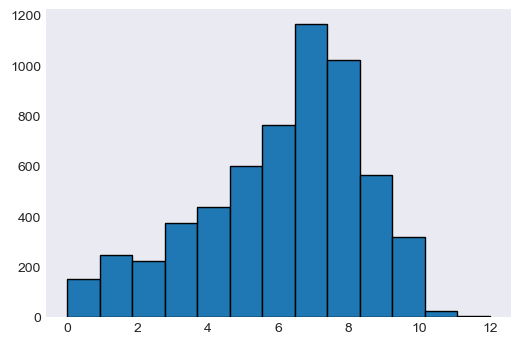

In [140]:
plt.figure(figsize=(6, 4))

# create a histogram for 'order_to_on_truck_days'
plt.hist(muesli2_df['order_to_on_truck_days'], bins = 13, edgecolor = 'k');

In [141]:
muesli2_df.groupby('ship_mode').count().order_to_on_truck_days.reset_index()

,ship_mode,order_to_on_truck_days
0,First Class,1305
1,Second Class,1147
2,Standard Class,3449


array([[<AxesSubplot:title={'center':'First Class'}>,
        <AxesSubplot:title={'center':'Second Class'}>],
       [<AxesSubplot:title={'center':'Standard Class'}>, <AxesSubplot:>]],
      dtype=object)

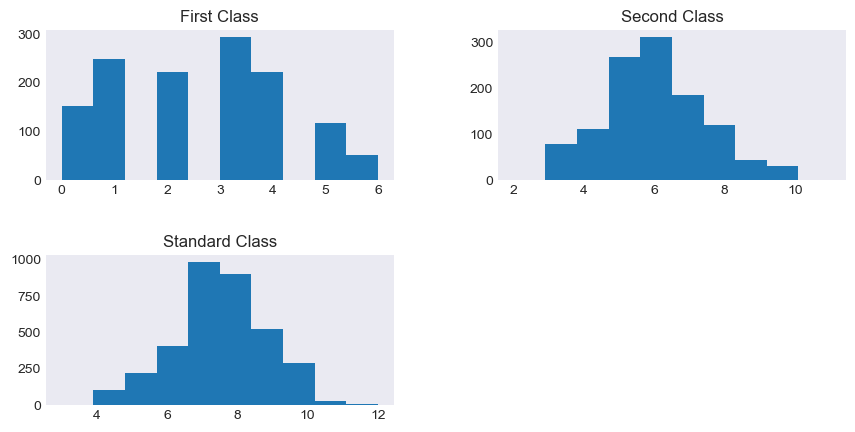

In [142]:
muesli2_df['order_to_on_truck_days'].hist(by=muesli2_df['ship_mode'], figsize=(10, 5), rot=0)


In [143]:
muesli2_df['order_month'] = muesli2_df['order_date'].dt.month
muesli2_df['order_month'] = muesli2_df['order_month'].apply(lambda x: calendar.month_abbr[x])
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date,order_to_on_truck_days,order_month
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,2019-01-23,NaT,NaT,NaT,7.00,Jan
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,2019-03-13,NaT,NaT,NaT,2.00,Mar
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-26,NaT,NaT,NaT,6.00,Jun
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-19,NaT,NaT,NaT,2.00,Jun
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaT,NaT,NaT,NaT,NaN,Nov


In [151]:
muesli2_df.groupby('order_month').count().order_to_on_truck_days.reset_index()

,order_month,order_to_on_truck_days
0,Apr,373
1,Aug,394
2,Dec,814
3,Feb,190
4,Jan,244
5,Jul,427
6,Jun,444
7,Mar,401
8,May,467
9,Nov,829


In [144]:
muesli2_df['order_day'] = muesli2_df['order_date'].dt.day_of_week
# muesli2_df['order_day'] = muesli2_df['order_date'].dt.day_name
muesli2_df.head()

,index,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,region,category,sub-category,product_id,on_truck_scan_date,arrival_scan_date,ready_to_ship_date,pickup_date,order_to_on_truck_days,order_month,order_day
0,27,CA-2019-121755,2019-01-16,Second Class,EH-13945,Eric Hoffmann,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,2019-01-23,NaT,NaT,NaT,7.00,Jan,2
1,45,CA-2019-118255,2019-03-11,First Class,ON-18715,Odella Nelson,United States,Eagan,Minnesota,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,2019-03-13,NaT,NaT,NaT,2.00,Mar,0
2,48,CA-2019-169194,2019-06-20,Standard Class,LH-16900,Lena Hernandez,United States,Dover,Delaware,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-26,NaT,NaT,NaT,6.00,Jun,3
3,60,CA-2019-111682,2019-06-17,First Class,TB-21055,Ted Butterfield,United States,Troy,New York,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,2019-06-19,NaT,NaT,NaT,2.00,Jun,0
4,63,CA-2018-135545,2018-11-24,Standard Class,KM-16720,Kunst Miller,United States,Los Angeles,California,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,NaT,NaT,NaT,NaT,NaN,Nov,5


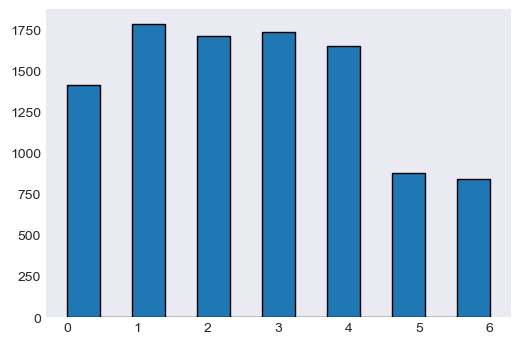

In [145]:
plt.figure(figsize=(6, 4))

# create a histogram for 'order_to_on_truck_days'
plt.hist(muesli2_df['order_day'], bins = 13, edgecolor = 'k');

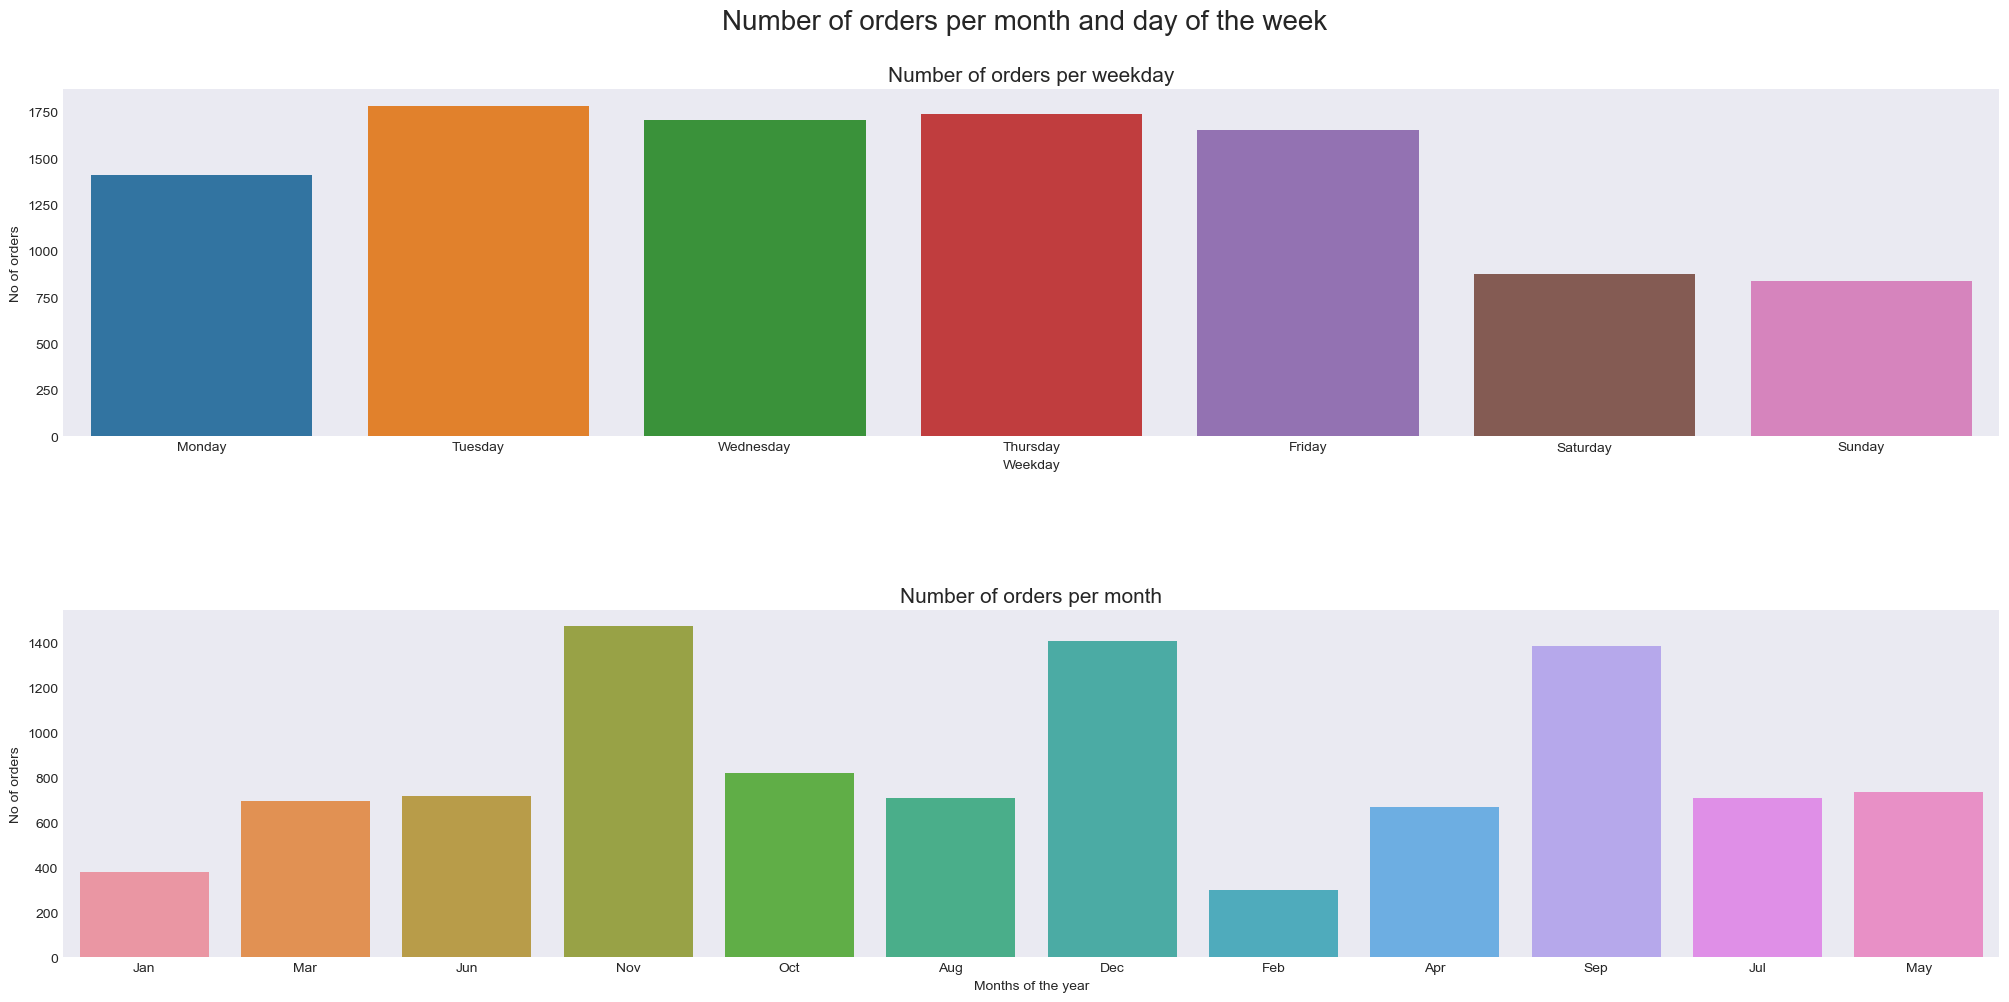

In [148]:
# df_music = df.query("category_name == 'Music'")

fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.suptitle('Number of orders per month and day of the week', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sn.countplot(x=muesli2_df['order_day'], ax=ax[0])
f1.set_ylabel("No of orders", fontsize = 10)
f1.set_xlabel("Weekday", fontsize = 10)
f1.set_xticks([0,1,2,3,4,5,6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of orders per weekday", fontsize = 15);

f2 = sn.countplot(x=muesli2_df['order_month'], ax=ax[1])
f2.set_ylabel("No of orders", fontsize = 10)
f2.set_xlabel("Months of the year", fontsize = 10)
# f2.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
# f2.set_xticklabels(labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
f2.set_title("Number of orders per month", fontsize = 15);

In [152]:
muesli2_df.groupby('region').count().order_to_on_truck_days.reset_index()

,region,order_to_on_truck_days
0,Central,1381
1,East,1687
2,South,931
3,West,1902


In [157]:
# Create new column called 'ship_to_pickup_days' to check the time between ready date and the ship pick-up date in the intern study data
muesli2_df['arrival_from_order_days'] = (muesli2_df['arrival_scan_date']-muesli2_df['order_date']).dt.days
# Check results
muesli2_df['arrival_from_order_days'].describe()

count   668.00
mean     10.89
std       2.88
min       3.00
25%       9.00
50%      12.00
75%      13.00
max      17.00
Name: arrival_from_order_days, dtype: float64

In [160]:
# correlation matrix between these variables
corr_columns=["order_day", "order_month", "arrival_from_order_days", "order_to_on_truck_days"]
corr_mtrx=muesli2_df[corr_columns].corr()
corr_mtrx

,order_day,arrival_from_order_days,order_to_on_truck_days
order_day,1.00,-0.10,0.02
arrival_from_order_days,-0.10,1.00,0.91
order_to_on_truck_days,0.02,0.91,1.00


In [158]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sn.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

NameError: name 'corr_mtrx' is not defined

<Figure size 1400x1200 with 0 Axes>

In [ ]:
# #blue = standard
# muesli2_df.query('ship_mode == "Second Class" or ship_mode == "Standard Class"').ship_mode.plot(kind='hist');
# #orange = express
# muesli2_df.query('ship_mode == "First Class"').ship_mode.plot(kind='hist');

In [ ]:
# Set figure size
plt.figure(figsize=(6, 4))

# Create histogram by specifying x-value
plt.hist(x = muesli2_df['order_to_on_truck_days'])
plt.hist(x = muesli2_df['ship_mode'])

# # Label your axes
# plt.xlabel("Quality")
# plt.ylabel("Frequency")

# Set title
plt.title("Delivery Days Based on Shipping Method")

# Show graphic
plt.show()

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
# Where I start to really diverge in method and ideas
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
# Nuels merge
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

In [ ]:
# merging 'Intern Data Study.csv' and 'Process Data.csv' into one 
Pro_Int_df = pd.merge(Int_df, pro_df, on =['order_id'])
# merging 'Pro_Int_df' and 'Campaign Data.csv' into one 
Cam_pro_int_df = pd.merge(Pro_Int_df, Cam_df, on = ['order_id'])
# Check results
Cam_pro_int_df.head()


In [ ]:
# check descriptive stats and info of new merged csv
# display(Cam_pro_int_df.describe())
display(Cam_pro_int_df.shape)
display(Cam_pro_int_df.info())

In [ ]:
# merging 'Cam_pro_int_df' and 'muesli_df' into one 
Muesli_df2 =pd.merge(muesli_df, Cam_pro_int_df, how = 'outer', on = ['order_id'])

In [ ]:
Muesli_df2.head()

In [ ]:
Muesli_df2.columns

In [ ]:
display(muesli_df.shape)
display(Muesli_df2.shape)

In [ ]:
Muesli_df2.info()